In [1]:
import pandas as pd
import requests
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json'
response = requests.get(url)
if response.status_code == 200:
    dados_json = response.json()
    df = pd.json_normalize(dados_json)
    print(df.head())
else:
    print('Erro:', response.status_code)


   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... 

In [2]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [4]:
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [6]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [7]:
df = df[df['Churn'].str.strip() != '']

In [8]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


🎯 Missão
Sua nova missão é desenvolver modelos preditivos capazes de prever quais clientes têm maior chance de cancelar seus serviços.

A empresa quer antecipar o problema da evasão, e cabe a você construir um pipeline robusto para essa etapa inicial de modelagem.

🧠 Objetivos do Desafio
Preparar os dados para a modelagem (tratamento, encoding, normalização).

Realizar análise de correlação e seleção de variáveis.

Treinar dois ou mais modelos de classificação.

Avaliar o desempenho dos modelos com métricas.

Interpretar os resultados, incluindo a importância das variáveis.

Criar uma conclusão estratégica apontando os principais fatores que influenciam a evasão.

🧰 O que você vai praticar
✅ Pré-processamento de dados para Machine Learning
✅ Construção e avaliação de modelos preditivos
✅ Interpretação dos resultados e entrega de insights
✅ Comunicação técnica com foco estratégico



In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Mapear variável alvo
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Remover linhas com NaN no target (por segurança)
df = df[df['Churn'].notna()]

# Resetar índice para evitar desalinhamentos
df.reset_index(drop=True, inplace=True)

# Separar X e y
y = df['Churn']
X = df.drop(columns=['customerID', 'Churn'])
# One-hot encoding para colunas categóricas
cat_cols = X.select_dtypes(include='object').columns.tolist()
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)



In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer.SeniorCitizen                         7043 non-null   int64  
 1   customer.tenure                                7043 non-null   int64  
 2   account.Charges.Monthly                        7043 non-null   float64
 3   account.Charges.Total                          7032 non-null   float64
 4   customer.gender_Male                           7043 non-null   bool   
 5   customer.Partner_Yes                           7043 non-null   bool   
 6   customer.Dependents_Yes                        7043 non-null   bool   
 7   phone.PhoneService_Yes                         7043 non-null   bool   
 8   phone.MultipleLines_No phone service           7043 non-null   bool   
 9   phone.MultipleLines_Yes                        7043 

In [11]:
# Converter booleanos True/False em inteiros 1/0
X = X.astype({col: 'int' for col in X.columns if X[col].dtype == 'bool'})


In [12]:
X.head()

,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,customer.gender_Male,customer.Partner_Yes,customer.Dependents_Yes,phone.PhoneService_Yes,phone.MultipleLines_No phone service,phone.MultipleLines_Yes,...,internet.StreamingTV_No internet service,internet.StreamingTV_Yes,internet.StreamingMovies_No internet service,internet.StreamingMovies_Yes,account.Contract_One year,account.Contract_Two year,account.PaperlessBilling_Yes,account.PaymentMethod_Credit card (automatic),account.PaymentMethod_Electronic check,account.PaymentMethod_Mailed check
0,0,9,65.6,593.30,0,1,1,1,0,0,...,0,1,0,0,1,0,1,0,0,1
1,0,9,59.9,542.40,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
2,0,4,73.9,280.85,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1,13,98.0,1237.85,1,1,0,1,0,0,...,0,1,0,1,0,0,1,0,1,0
4,1,3,83.9,267.40,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1


In [13]:
X.isna().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
account.Charges.Monthly,0
account.Charges.Total,11
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0
phone.MultipleLines_No phone service,0
phone.MultipleLines_Yes,0


In [14]:
indices_to_drop = X[X['account.Charges.Total'].isna()].index

# Remover esses índices de X e y para manter alinhamento
X = X.drop(indices_to_drop)
y = y.drop(indices_to_drop)

In [15]:
X.isna().sum()

,0
customer.SeniorCitizen,0
customer.tenure,0
account.Charges.Monthly,0
account.Charges.Total,0
customer.gender_Male,0
customer.Partner_Yes,0
customer.Dependents_Yes,0
phone.PhoneService_Yes,0
phone.MultipleLines_No phone service,0
phone.MultipleLines_Yes,0


In [16]:
#separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [17]:
import statsmodels.api as sm
X_train_states = sm.add_constant(X_train)
model = sm.Logit(y_train, X_train_states).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.414380
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 5625
Model:                          Logit   Df Residuals:                     5601
Method:                           MLE   Df Model:                           23
Date:                Wed, 02 Jul 2025   Pseudo R-squ.:                  0.2843
Time:                        21:30:46   Log-Likelihood:                -2330.9
converged:                       True   LL-Null:                       -3257.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                 

In [18]:
# Extrair o resumo da regressão logística
summary_df = model.summary2().tables[1]

# Renomear colunas para facilitar
summary_df = summary_df.rename(columns={"Coef.": "coef", "P>|z|": "p_value"})

# Filtrar variáveis significativas (p < 0.05)
significant = summary_df[summary_df["p_value"] < 0.05]

# Separar variáveis que aumentam o churn (coef > 0)
increase_churn = significant[significant["coef"] > 0]

# Separar variáveis que diminuem o churn (coef < 0)
decrease_churn = significant[significant["coef"] < 0]

# Visualizar
print("📈 Variáveis que AUMENTAM o churn:")
display(increase_churn)

print("📉 Variáveis que REDUZEM o churn:")
display(decrease_churn)


📈 Variáveis que AUMENTAM o churn:


,coef,Std.Err.,z,p_value,[0.025,0.975]
customer.SeniorCitizen,0.257593,0.076450,3.369429,7.532422e-04,0.107754,0.407433
account.Charges.Total,0.000298,0.000093,3.217482,1.293209e-03,0.000117,0.000480
phone.MultipleLines_Yes,0.461652,0.209315,2.205531,2.741682e-02,0.051401,0.871902
internet.InternetService_Fiber optic,2.001506,0.858262,2.332045,1.969835e-02,0.319343,3.683669
internet.StreamingTV_Yes,0.772463,0.389814,1.981621,4.752170e-02,0.008442,1.536484
internet.StreamingMovies_Yes,0.629056,0.124353,5.058646,4.222438e-07,0.385329,0.872783
account.PaperlessBilling_Yes,0.368950,0.083754,4.405171,1.057006e-05,0.204795,0.533104


📉 Variáveis que REDUZEM o churn:


,coef,Std.Err.,z,p_value,[0.025,0.975]
customer.tenure,-0.055975,0.006801,-8.230140,1.869953e-16,-0.069305,-0.042645
account.Contract_One year,-0.711266,0.108778,-6.538717,6.204877e-11,-0.924466,-0.498066
account.Contract_Two year,-1.326119,0.195507,-6.782969,1.177313e-11,-1.709306,-0.942932


In [19]:
churn_effects = pd.concat([increase_churn, decrease_churn])

churn_effects

,coef,Std.Err.,z,p_value,[0.025,0.975]
customer.SeniorCitizen,0.257593,0.076450,3.369429,7.532422e-04,0.107754,0.407433
account.Charges.Total,0.000298,0.000093,3.217482,1.293209e-03,0.000117,0.000480
phone.MultipleLines_Yes,0.461652,0.209315,2.205531,2.741682e-02,0.051401,0.871902
internet.InternetService_Fiber optic,2.001506,0.858262,2.332045,1.969835e-02,0.319343,3.683669
internet.StreamingTV_Yes,0.772463,0.389814,1.981621,4.752170e-02,0.008442,1.536484
internet.StreamingMovies_Yes,0.629056,0.124353,5.058646,4.222438e-07,0.385329,0.872783
account.PaperlessBilling_Yes,0.368950,0.083754,4.405171,1.057006e-05,0.204795,0.533104
customer.tenure,-0.055975,0.006801,-8.230140,1.869953e-16,-0.069305,-0.042645
account.Contract_One year,-0.711266,0.108778,-6.538717,6.204877e-11,-0.924466,-0.498066
account.Contract_Two year,-1.326119,0.195507,-6.782969,1.177313e-11,-1.709306,-0.942932


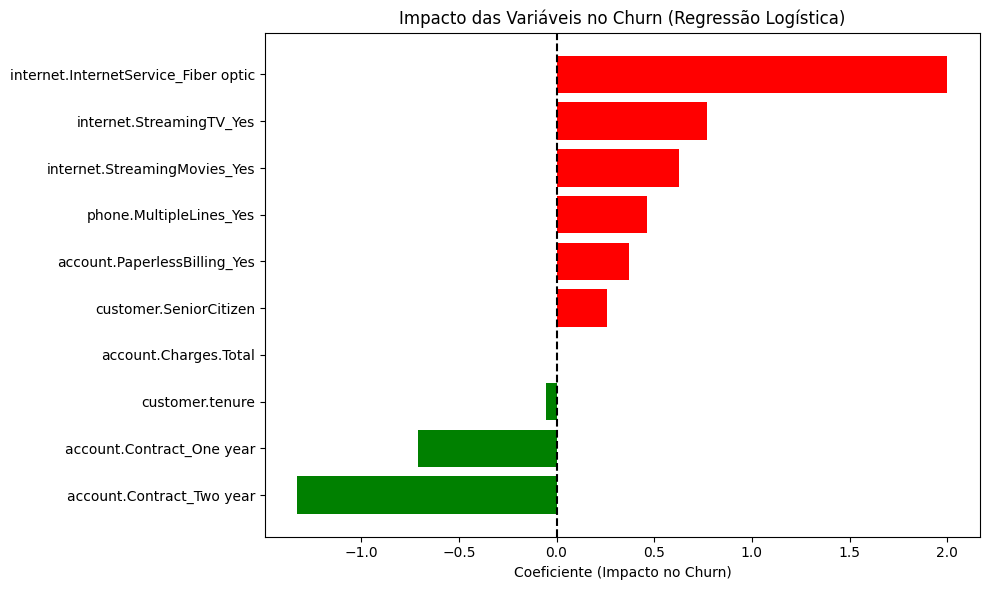

In [20]:
import matplotlib.pyplot as plt

# Montar DataFrame com as variáveis importantes
importancia = {
    'Variável': churn_effects.index,
    'Impacto (coef)': churn_effects['coef'].values
}
df_imp = pd.DataFrame(importancia)

# Ordenar por impacto
df_imp = df_imp.sort_values(by='Impacto (coef)')

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(df_imp['Variável'], df_imp['Impacto (coef)'], color=df_imp['Impacto (coef)'].apply(lambda x: 'green' if x < 0 else 'red'))
plt.title('Impacto das Variáveis no Churn (Regressão Logística)')
plt.axvline(0, color='black', linestyle='--')
plt.xlabel('Coeficiente (Impacto no Churn)')
plt.tight_layout()
plt.show()


🔺 Variáveis que AUMENTAM o Churn
Senior Citizen
→ Impacto: +0.26 | p-valor: 0.0008
→ Idosos tendem a cancelar mais

Total Charges
→ Impacto: +0.0003 | p-valor: 0.0013
→ Quanto maior o total cobrado, maior a evasão

Múltiplas Linhas
→ Impacto: +0.46 | p-valor: 0.027
→ Linhas adicionais aumentam churn

Internet: Fibra ótica
→ Impacto: +2.00 | p-valor: 0.020
→ Clientes com fibra ótica têm maior probabilidade de churn

Streaming TV
→ Impacto: +0.77 | p-valor: 0.048
→ Uso de TV por streaming está associado ao churn

Streaming Filmes
→ Impacto: +0.63 | p-valor: 0.000
→ Clientes que assistem filmes têm mais churn

Cobrança digital (Paperless Billing)
→ Impacto: +0.37 | p-valor: 0.00001
→ Cobrança online se relaciona com maior evasão

🔻 Variáveis que REDUZEM o Churn
Tempo de permanência
→ Impacto: –0.056 | p-valor: <0.0001
→ Quanto maior o tempo com a empresa, menor a chance de churn

Contrato de 1 ano
→ Impacto: –0.71 | p-valor: <0.0001
→ Contratos anuais reduzem significativamente o churn

Contrato de 2 anos
→ Impacto: –1.33 | p-valor: <0.0001
→ Contratos de longo prazo reduzem ainda mais o churn

In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xgb.fit(X_train, y_train)

# 10. Avaliar desempenho
for model, name in zip([ xgb], ['XGBoost']):
    preds = model.predict(X_test)
    print(f"\n🔍 Avaliação do Modelo: {name}")
    print(confusion_matrix(y_test, preds))
    print(classification_report(y_test, preds))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:30:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🔍 Avaliação do Modelo: XGBoost
[[910 123]
 [184 190]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.61      0.51      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.78      1407



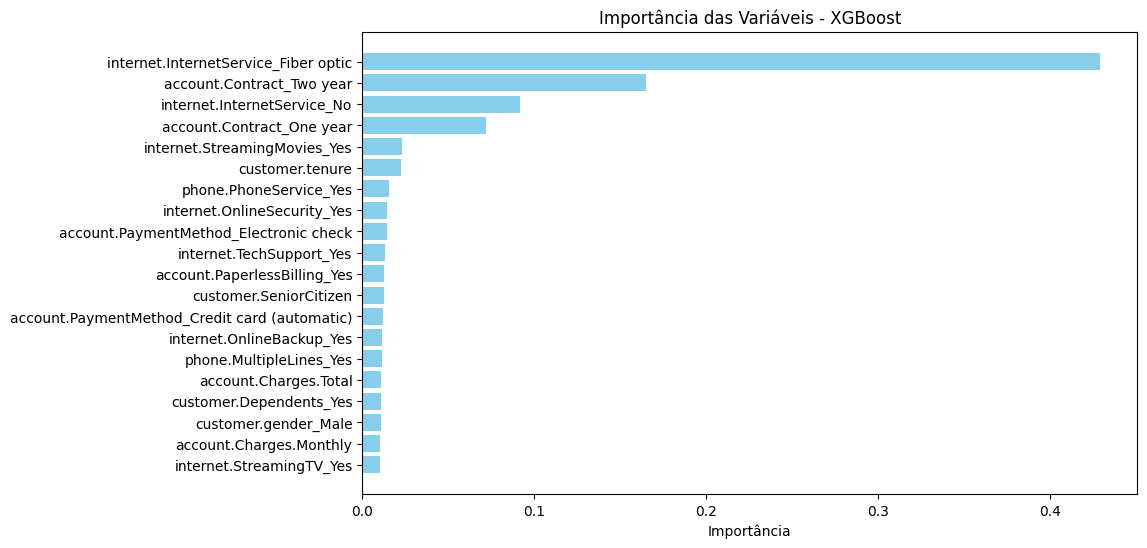

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_feature_importance(model, X, model_name):
    importances = model.feature_importances_
    features = X.columns

    # Criar DataFrame para facilitar visualização
    fi_df = pd.DataFrame({'feature': features, 'importance': importances})
    fi_df = fi_df.sort_values(by='importance', ascending=False).head(20)  # top 20

    # Plot
    plt.figure(figsize=(10,6))
    plt.barh(fi_df['feature'][::-1], fi_df['importance'][::-1], color='skyblue')
    plt.title(f'Importância das Variáveis - {model_name}')
    plt.xlabel('Importância')
    plt.show()

# Após treinar os modelos rf e xgb:
#plot_feature_importance(rf, X_train, 'Random Forest')
plot_feature_importance(xgb, X_train, 'XGBoost')


📌 PONTOS EM COMUM (evidência reforçada)

Internet: Fibra ótica (internet.InternetService_Fiber optic) :
→ Regressão Logística: Aumenta churn (forte impacto)
→ XGBoost: Mais importante do modelo

Contrato de 2 anos (account.Contract_Two year) :
→ Regressão Logística: Reduz churn (coeficiente negativo)
→ XGBoost: Alta importância (protege contra evasão)

Contrato de 1 ano (account.Contract_One year) :
→ Regressão Logística: Reduz churn (coeficiente negativo)
→ XGBoost: Importância alta (efeito protetor)

Streaming de filmes (internet.StreamingMovies_Yes) :
→ Regressão Logística: Aumenta churn
→ XGBoost: Importante

Tempo de permanência (customer.tenure) ⁉
→ Regressão Logística: Reduz churn
→ XGBoost: Importância moderada